# Dataset Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir dataset
!cp /content/drive/MyDrive/Capstone/dataset/symptoms.csv dataset/symptoms.csv

# Setup

In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
DATASET_PATH = 'dataset/symptoms.csv'
SPLIT_SIZE = 0.2

# Data Processing

Read CSV and convert the content to float64

In [13]:
df = pd.read_csv(DATASET_PATH).astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sleep_deprv      16 non-null     float64
 1   itchy_eye        16 non-null     float64
 2   dry_eye          16 non-null     float64
 3   light_sensitive  16 non-null     float64
 4   burn_sensation   16 non-null     float64
 5   eye_tears        16 non-null     float64
 6   blurry_vision    16 non-null     float64
 7   eye_condition    16 non-null     float64
 8   diagnosis        16 non-null     float64
dtypes: float64(9)
memory usage: 1.2 KB


In [30]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=SPLIT_SIZE, random_state=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12, 8)
(12,)
(4, 8)
(4,)


# Model Setup

In [59]:
class CustomCallback(tf.keras.callbacks.Callback):
  def __init__(self):
    super(CustomCallback, self).__init__()
    self.prev_acc = 0.0

  def on_epoch_end(self, epoch, logs=None):
    self.prev_acc = logs['accuracy']

    # Early stop when there is no accuracy or loss improvement
    if epoch > 10 and self.prev_acc < 0.5:
      self.model.stop_training = True
      print("\nStopped the training because there is no improvement")

    # Early stop when the model has achieved the desired accuracy
    # if logs['accuracy'] >= 0.9 and logs['loss'] < 0.01:
    #   self.model.stop_training = True
    #   print("\nAlready met the desired accuracy")

In [262]:
tf.keras.backend.clear_session()

In [263]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(8,)),
    tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.1), activation='relu'),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.1), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,329 (138.00 KB)

 Trainable params: 35,329 (138.00 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [264]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0158),
    metrics=['accuracy', 'mse']
)

model_obj = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[CustomCallback()]
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4167 - loss: 19.2180 - mse: 0.2606 - val_accuracy: 0.7500 - val_loss: 13.1300 - val_mse: 0.2195
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9167 - loss: 13.1106 - mse: 0.2100 - val_accuracy: 1.0000 - val_loss: 8.5815 - val_mse: 0.1999
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9167 - loss: 8.5663 - mse: 0.1925 - val_accuracy: 1.0000 - val_loss: 5.3832 - val_mse: 0.1792
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9167 - loss: 5.3805 - mse: 0.1782 - val_accuracy: 1.0000 - val_loss: 3.3044 - val_mse: 0.1603
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9167 - loss: 3.3082 - mse: 0.1627 - val_accuracy: 1.0000 - val_loss: 2.0863 - val_mse: 0.1399
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9167 - loss: 2.0975 - mse: 0.1463 - val_accuracy: 1.0000 - val_loss: 1.5068 - val_mse: 0.1192
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

# Model Tuning (Experiment)
> This section is only for experiment. Therefore, optional. Make sure you haven't compile or train the model yet!

In [260]:
# Learning rate scheduler

tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(8,)),
    tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.1), activation='relu'),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.1), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10 ** (epoch / 20))

model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-6),
    metrics=['accuracy', 'mse']
)

model_obj = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[lr_schedule]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,329 (138.00 KB)

 Trainable params: 35,329 (138.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 18.5906 - mse: 0.2591 - val_accuracy: 0.7500 - val_loss: 18.5814 - val_mse: 0.2416 - learning_rate: 1.0000e-06
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5000 - loss: 18.5901 - mse: 0.2591 - val_accuracy: 0.7500 - val_loss: 18.5809 - val_mse: 0.2416 - learning_rate: 1.1220e-06
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 18.5896 - mse: 0.2591 - val_accuracy: 0.7500 - val_loss: 18.5803 - val_mse: 0.2416 - learning_rate: 1.2589e-06
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5000 - loss: 18.5891 - mse: 0.2591 - val_accuracy: 0.7500 - val_loss: 18.5797 - val_mse: 0.2416 - learning_rate: 1.4125e-06
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 18.5884 - mse: 0.2591 - val_accuracy: 0.7500 - val_loss: 18.5790 - val_mse: 0.2416 - learning_rate: 1.5849e-06
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 

# Model Evaluation


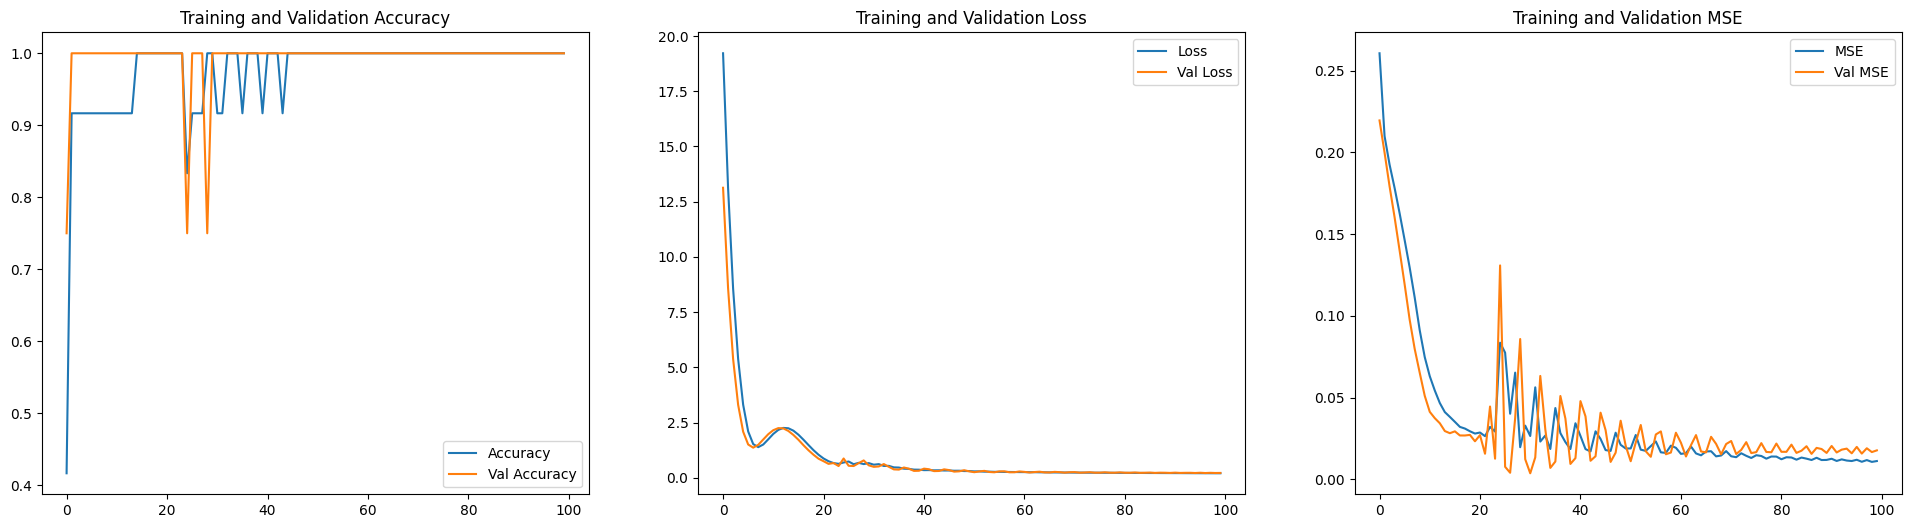

In [265]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax[0].plot(model_obj.history['accuracy'], label='Accuracy')
ax[0].plot(model_obj.history['val_accuracy'], label='Val Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend()

ax[1].plot(model_obj.history['loss'], label='Loss')
ax[1].plot(model_obj.history['val_loss'], label='Val Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend()

ax[2].plot(model_obj.history['mse'], label='MSE')
ax[2].plot(model_obj.history['val_mse'], label='Val MSE')
ax[2].set_title('Training and Validation MSE')
ax[2].legend()

plt.show()

# Predict

In [266]:
for x in x_test.to_numpy():
  print(f"\n{x}")
  prediction = model.predict(tf.constant([x]), verbose=0)[0][0]

  print("Diagnosis: {}".format("Positive" if (prediction > 0.5) else "Negative"))
  print(f"Prediction: {prediction}")


[1. 1. 1. 1. 1. 1. 1. 0.]
Diagnosis: Positive
Prediction: 0.9862117767333984

[0. 0. 0. 0. 0. 0. 0. 1.]
Diagnosis: Negative
Prediction: 0.03319379687309265

[0. 0. 0. 0. 1. 0. 0. 1.]
Diagnosis: Negative
Prediction: 0.2632269263267517

[0. 0. 0. 1. 0. 0. 1. 0.]
Diagnosis: Negative
Prediction: 0.008784325793385506
